In [1]:
# Install required packages
!pip install torch torchvision ultralytics
!pip install opencv-python matplotlib
!pip install ipywidgets # for interactive displays

'pip' is not recognized as an internal or external command,
operable program or batch file.
'pip' is not recognized as an internal or external command,
operable program or batch file.
'pip' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
# Import required libraries
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
from ultralytics import YOLO
import time

# For display
from IPython.display import display, Image as IPImage
%pip install ipywidgets
import ipywidgets as widgets

# Check if GPU is available
print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"CUDA device: {torch.cuda.get_device_name(0)}")

   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   --------- ------------------------------ 0.5/2.2 MB 2.3 MB/s eta 0:00:01
   ----------------------- ---------------- 1.3/2.2 MB 3.4 MB/s eta 0:00:01
   ---------------------------------------- 2.2/2.2 MB 3.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
PyTorch version: 2.7.0+cpu
CUDA available: False



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
# Load a pretrained YOLO model (YOLOv8n by default)
# You can choose different model sizes: n (nano), s (small), m (medium), l (large), x (extra large)
model = YOLO('yolov8n.pt')  # this downloads the model if not already present

print(f"Model loaded: YOLOv8n")
print(f"Model supports the following classes: {model.names}")

100%|██████████| 6.25M/6.25M [00:01<00:00, 4.43MB/s]


Model loaded: YOLOv8n
Model supports the following classes: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse',

In [7]:
# Utility functions for object detection

def detect_objects_in_image(model, image_path, conf_threshold=0.25):
    """
    Detect objects in an image using the YOLO model
    
    Args:
        model: YOLO model
        image_path: Path to the image
        conf_threshold: Confidence threshold for detections
        
    Returns:
        results: YOLO results object
        img: Original image with bounding boxes
    """
    # Run inference on the image
    results = model(image_path, conf=conf_threshold)
    
    # Get the annotated image with bounding boxes
    for r in results:
        img = r.plot()
        
    return results[0], img

def display_detection_results(img, results):
    """
    Display detection results with annotations
    
    Args:
        img: Image with bounding boxes
        results: YOLO results object
    """
    # Convert from BGR (OpenCV default) to RGB for matplotlib
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Plot the image with detections
    plt.figure(figsize=(12, 8))
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.title(f"Detected {len(results.boxes)} objects")
    plt.show()
    
    # Print detection details
    boxes = results.boxes
    if len(boxes) > 0:
        print(f"\nDetection Details:")
        print("-" * 50)
        for i, box in enumerate(boxes):
            cls_id = int(box.cls.item())
            class_name = results.names[cls_id]
            confidence = box.conf.item()
            x1, y1, x2, y2 = [int(coord) for coord in box.xyxy[0].tolist()]
            print(f"Object {i+1}: Class = {class_name}, Confidence = {confidence:.2f}, Bounding Box = [{x1}, {y1}, {x2}, {y2}]")
    else:
        print("No objects detected.")


image 1/1 c:\Users\conno\Downloads\test_image.jpg: 384x640 2 persons, 1 tie, 88.3ms
Speed: 5.4ms preprocess, 88.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


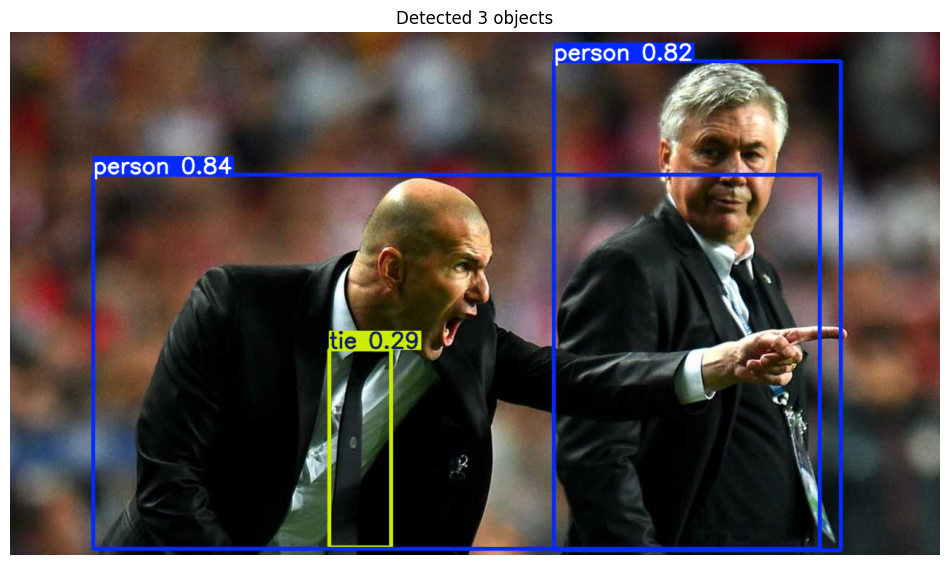


Detection Details:
--------------------------------------------------
Object 1: Class = person, Confidence = 0.84, Bounding Box = [114, 197, 1114, 711]
Object 2: Class = person, Confidence = 0.82, Bounding Box = [748, 41, 1143, 713]
Object 3: Class = tie, Confidence = 0.29, Bounding Box = [439, 437, 524, 709]


In [9]:
# Test detection on a sample image from URL

import urllib.request

# Download a test image using Python
image_url = "https://ultralytics.com/images/zidane.jpg"
sample_path = "test_image.jpg"
urllib.request.urlretrieve(image_url, sample_path)

# Run detection
results, annotated_img = detect_objects_in_image(model, sample_path)

# Display results
display_detection_results(annotated_img, results)

In [10]:
# For uploading your own images (run this in Google Colab)
# If you're using a local Jupyter notebook, you can use other methods to select images

def upload_and_detect():
    """
    Function to upload an image and run object detection
    Note: This works best in Google Colab
    """
    try:
        from google.colab import files
        uploaded = files.upload()
        for filename in uploaded.keys():
            print(f"Uploaded file: {filename}")
            results, annotated_img = detect_objects_in_image(model, filename)
            display_detection_results(annotated_img, results)
    except ImportError:
        print("This function works best in Google Colab.")
        print("If you're running locally, please use the next cell to specify a path to your image.")

# Uncomment to use in Colab
# upload_and_detect()

In [11]:
# For detecting objects in local images

def detect_local_image(image_path, conf_threshold=0.25):
    """
    Run detection on a local image
    
    Args:
        image_path: Path to the local image
        conf_threshold: Confidence threshold
    """
    if not os.path.exists(image_path):
        print(f"Error: File {image_path} not found.")
        return
    
    print(f"Running detection on {image_path}...")
    results, annotated_img = detect_objects_in_image(model, image_path, conf_threshold)
    display_detection_results(annotated_img, results)
    
    return results, annotated_img

# Example usage (uncomment and change path to your image)
# image_path = "path/to/your/image.jpg"  # Change this to your image path
# detect_local_image(image_path)

In [12]:
# For processing video

def process_video(video_path, output_path='output_video.mp4', conf_threshold=0.25, save_video=True, display_frames=False):
    """
    Process a video file for object detection
    
    Args:
        video_path: Path to input video
        output_path: Path to save output video
        conf_threshold: Confidence threshold for detection
        save_video: Whether to save the processed video
        display_frames: Whether to display frames during processing (slows down execution)
    """
    if not os.path.exists(video_path):
        print(f"Error: Video file {video_path} not found.")
        return
    
    # Open the video file
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print(f"Error: Could not open video {video_path}")
        return
    
    # Get video properties
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = cap.get(cv2.CAP_PROP_FPS)
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    
    print(f"Video properties: {width}x{height} at {fps} fps, {total_frames} frames")
    
    # Initialize video writer if saving
    if save_video:
        fourcc = cv2.VideoWriter_fourcc(*'mp4v')
        out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))
    
    # Process the video
    frame_count = 0
    start_time = time.time()
    
    try:
        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                break
                
            # Process frame
            results = model(frame, conf=conf_threshold)
            annotated_frame = results[0].plot()
            
            # Save frame
            if save_video:
                out.write(annotated_frame)
            
            # Display frame
            if display_frames and frame_count % 5 == 0:  # Show every 5th frame
                img_rgb = cv2.cvtColor(annotated_frame, cv2.COLOR_BGR2RGB)
                plt.figure(figsize=(10, 6))
                plt.imshow(img_rgb)
                plt.axis('off')
                plt.title(f"Frame {frame_count}/{total_frames}")
                plt.show()
            
            # Update progress
            frame_count += 1
            if frame_count % 50 == 0:
                elapsed = time.time() - start_time
                fps_processing = frame_count / elapsed
                estimated_total = elapsed * (total_frames / frame_count)
                remaining = estimated_total - elapsed
                print(f"Processed {frame_count}/{total_frames} frames ({frame_count/total_frames*100:.1f}%) - {fps_processing:.1f} fps - ETA: {remaining:.1f}s")
    
    except KeyboardInterrupt:
        print("Processing interrupted")
    
    finally:
        # Release resources
        cap.release()
        if save_video:
            out.release()
        
        print(f"Processing complete: {frame_count}/{total_frames} frames processed")
        if save_video and os.path.exists(output_path):
            print(f"Output saved to {output_path}")

# Example usage (uncomment and change path to your video)
# video_path = "path/to/your/video.mp4"  # Change this to your video path
# process_video(video_path, display_frames=False)

In [13]:
# Real-time object detection with webcam

def detect_webcam(camera_id=0, conf_threshold=0.25, save_video=False, output_path='webcam_output.mp4'):
    """
    Run real-time object detection using webcam
    
    Args:
        camera_id: Webcam ID (usually 0 for built-in webcam)
        conf_threshold: Confidence threshold
        save_video: Whether to save the output video
        output_path: Path to save output video if save_video is True
    """
    # Initialize webcam
    cap = cv2.VideoCapture(camera_id)
    if not cap.isOpened():
        print(f"Error: Could not open webcam with ID {camera_id}")
        return
    
    # Get webcam properties
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = 30  # Target FPS
    
    # Initialize video writer if saving
    out = None
    if save_video:
        fourcc = cv2.VideoWriter_fourcc(*'mp4v')
        out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))
    
    print("Webcam object detection started. Press 'q' to quit.")
    
    try:
        while True:
            # Read frame
            ret, frame = cap.read()
            if not ret:
                break
            
            # Run detection
            results = model(frame, conf=conf_threshold)
            annotated_frame = results[0].plot()
            
            # Save frame if requested
            if save_video and out is not None:
                out.write(annotated_frame)
            
            # Display the frame
            cv2.imshow("YOLO Object Detection", annotated_frame)
            
            # Break the loop on 'q' press
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break
    
    except KeyboardInterrupt:
        print("Webcam detection interrupted")
        
    finally:
        # Release resources
        cap.release()
        if save_video and out is not None:
            out.release()
        cv2.destroyAllWindows()
        print("Webcam detection stopped")
        if save_video:
            print(f"Output saved to {output_path}")

# Example usage (uncomment to run)
# detect_webcam(camera_id=0)  # Use default webcam

## Advanced: Custom Training

You can train YOLO on your own custom dataset to detect specific objects. Here are the basic steps:

1. Prepare a dataset in YOLO format
2. Create a dataset YAML configuration file
3. Train the model
4. Evaluate and export the model

The code cell below shows how to train a model on a custom dataset.

In [15]:
# Custom training on your own dataset
'''
# Example dataset.yaml file structure
# Save this as 'dataset.yaml'

path: /path/to/dataset  # dataset root directory
train: images/train  # train images (relative to 'path')
val: images/val  # val images (relative to 'path')

nc: 3  # number of classes
names: ['person', 'car', 'bicycle']  # class names
'''

# Training function
def train_custom_model(yaml_path, epochs=100, batch_size=16, img_size=640):
    """
    Train a custom YOLO model
    
    Args:
        yaml_path: Path to dataset YAML file
        epochs: Number of training epochs
        batch_size: Batch size
        img_size: Input image size
    """
    # Create a new model from YOLO
    model = YOLO('yolov8n.pt')  # Start with pretrained model
    
    # Train the model
    results = model.train(
        data=yaml_path,
        epochs=epochs,
        batch=batch_size,
        imgsz=img_size,
        patience=50,  # Early stopping patience
        save=True,  # Save checkpoints
        device='0' if torch.cuda.is_available() else 'cpu'
    )
    
    print("Training complete!")
    return model

# Usage example
# yaml_path = "path/to/your/dataset.yaml"  # Change to your dataset YAML path
# trained_model = train_custom_model(yaml_path, epochs=50)

In [24]:
detect_webcam()

Webcam object detection started. Press 'q' to quit.

0: 480x640 2 persons, 1 chair, 107.4ms
Speed: 4.8ms preprocess, 107.4ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 persons, 104.6ms
Speed: 3.7ms preprocess, 104.6ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 persons, 1 chair, 74.0ms
Speed: 3.0ms preprocess, 74.0ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 persons, 1 chair, 78.6ms
Speed: 2.7ms preprocess, 78.6ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 persons, 1 chair, 77.8ms
Speed: 2.4ms preprocess, 77.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 persons, 70.4ms
Speed: 2.2ms preprocess, 70.4ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 persons, 1 chair, 75.2ms
Speed: 2.5ms preprocess, 75.2ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)

0: 480x64

In [19]:
%pip install kagglehub

import kagglehub

# Download latest version
path = kagglehub.dataset_download("andrewmvd/road-sign-detection")

print("Path to dataset files:", path)

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


100%|██████████| 218M/218M [02:30<00:00, 1.52MB/s] 

Extracting files...


Path to dataset files: C:\Users\conno\.cache\kagglehub\datasets\andrewmvd\road-sign-detection\versions\1


Created template dataset.yaml at C:\Users\conno\.cache\kagglehub\datasets\andrewmvd\road-sign-detection\versions\1\dataset.yaml. Please edit it to match your dataset structure before training.
Ultralytics 8.3.139  Python-3.13.3 torch-2.7.0+cpu CPU (AMD Ryzen 5 8640HS w/ Radeon 760M Graphics)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=C:\Users\conno\.cache\kagglehub\datasets\andrewmvd\road-sign-detection\versions\1\dataset.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.0

RuntimeError: Dataset 'C://Users/conno/.cache/kagglehub/datasets/andrewmvd/road-sign-detection/versions/1/dataset.yaml' error  Dataset 'C://Users/conno/.cache/kagglehub/datasets/andrewmvd/road-sign-detection/versions/1/dataset.yaml' images not found, missing path 'C:\Users\conno\.cache\kagglehub\datasets\andrewmvd\road-sign-detection\versions\1\images\val'
Note dataset download directory is 'C:\Users\conno\AppData\Local\Programs\Microsoft VS Code\datasets'. You can update this in 'C:\Users\conno\AppData\Roaming\Ultralytics\settings.json'

## Conclusion and Next Steps

Congratulations! You've now set up a complete YOLO object detection workflow. You can:

1. Detect objects in images
2. Process videos for object detection
3. Use your webcam for real-time detection
4. Train custom models for specific use cases

### Next Steps

- Try different YOLO models (yolov8s.pt, yolov8m.pt, etc.) for different speed/accuracy tradeoffs
- Experiment with confidence thresholds
- Create a custom dataset for your specific needs
- Deploy your model to edge devices or cloud services

For more information, visit the [Ultralytics YOLOv8 documentation](https://docs.ultralytics.com/).